In [ ]:
Which Machine LEarning Models Are Sensitive To Outliers?
Naivye Bayes Classifier--- Not Sensitive To Outliers
SVM-------- Not Sensitive To Outliers
Linear Regression---------- Sensitive To Outliers
Logistic Regression------- Sensitive To Outliers
Decision Tree Regressor or Classifier---- Not Sensitive
Ensemble(RF,XGboost,GB)------- Not Sensitive
KNN--------------------------- Not Sensitive
Kmeans------------------------ Sensitive
Hierarichal------------------- Sensitive
PCA-------------------------- Sensitive
Neural Networks-------------- Sensitive

In [14]:
import pandas as pd

In [15]:
df=pd.read_csv('/Users/sripadma/Desktop/Data science/Data/titanic.csv')

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
df['Age'].isnull().sum()

177

In [19]:
import seaborn as sns


/var/folders/_r/tkfgmsk95xxb31zjgwrt989m0000gn/T/ipykernel_3138/315930958.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].dropna())
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

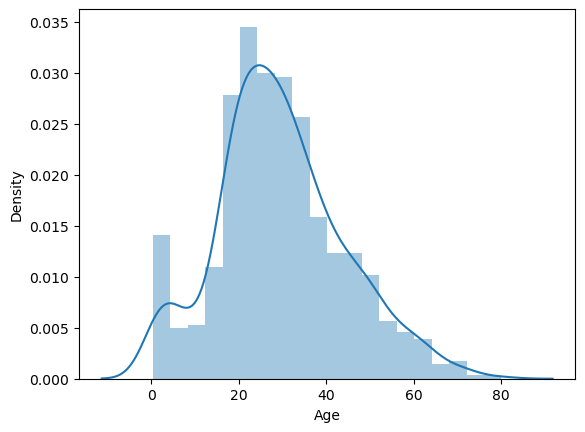

In [20]:
sns.distplot(df['Age'].dropna())

/var/folders/_r/tkfgmsk95xxb31zjgwrt989m0000gn/T/ipykernel_3138/3770725640.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'].fillna(100))
/Library/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

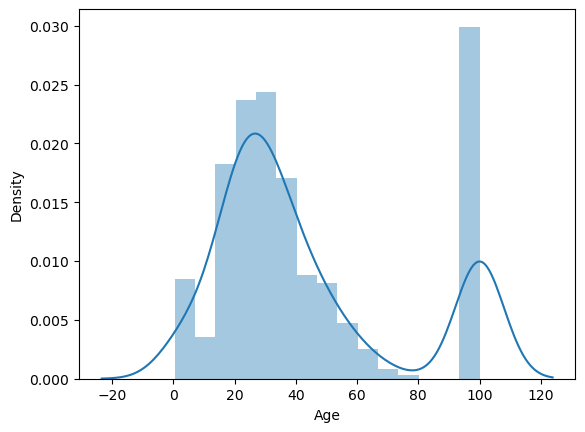

In [21]:
# add the outliner
sns.distplot(df['Age'].fillna(100))

In [ ]:
### Gausssian distribution

Text(0, 0.5, 'No of passenger')

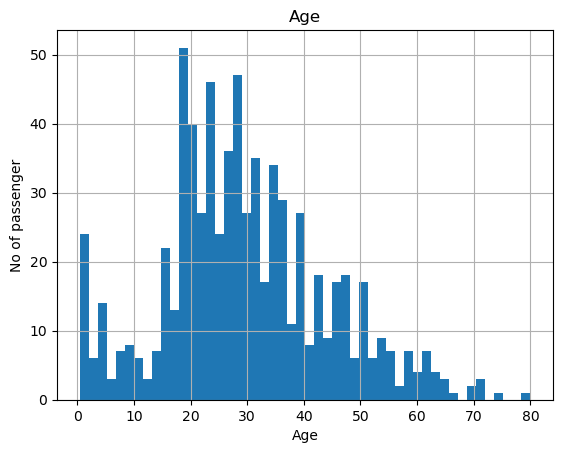

In [22]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

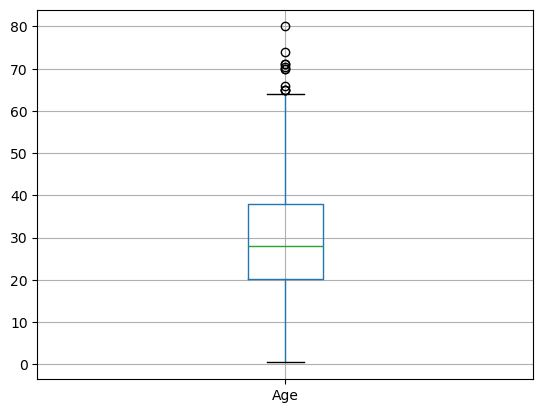

In [23]:
figure=df.boxplot(column='Age')

In [24]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

###### If the data is normally distributed we use this 

In [25]:
### Assuming Age follows  Gaussian Distribution we will calculate the boundaries which differentiates the outliers

df['Age'].mean()

29.69911764705882

In [30]:
upper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()

In [32]:
print(upper_boundary)
print(lower_boundary)
print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


In [37]:
# Lets compute the Interquantile range of calculate the boundaries
IQR = df.Age.quantile(0.75)-df.Age.quantile(0.25)

In [38]:
IQR

17.875

In [40]:
lower_bridge=df['Age'].quantile (0.25)-(IQR*1.5)
higher_bridge=df['Age'].quantile (0.75)+(IQR*1.5)
print(lower_bridge)
print(higher_bridge)

-6.6875
64.8125


In [41]:
## Extreme outliers ------multiply by 3
lower_bridge=df['Age'].quantile (0.25)-(IQR*3)
higher_bridge=df['Age'].quantile (0.75)+(IQR*3)
print(lower_bridge)
print(higher_bridge)

-33.5
91.625


##### Features is skewed

Text(0, 0.5, 'No of passenger')

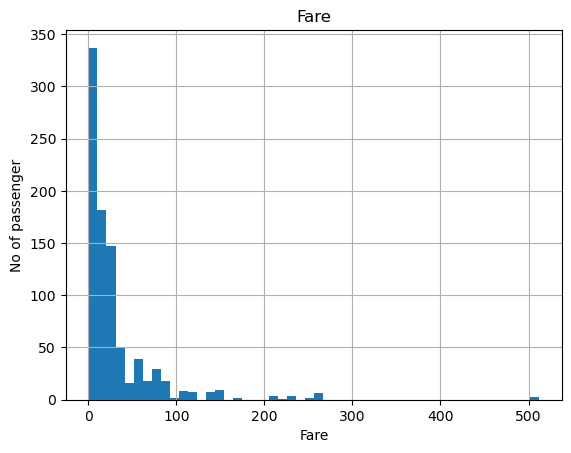

In [43]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

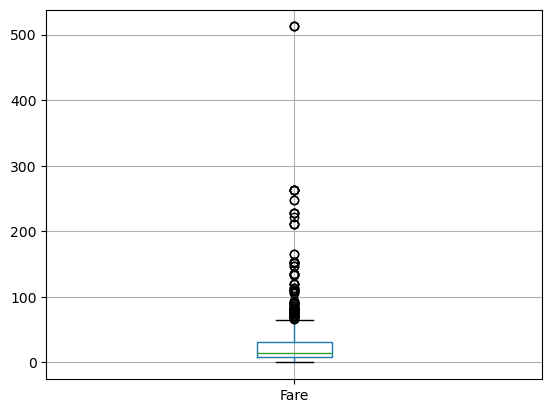

In [44]:
figure=df.boxplot(column='Fare')

In [45]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [47]:
upper_boundary=df['Fare'].mean() + 3* df['Fare'].std()
lower_boundary=df['Fare'].mean() - 3* df['Fare'].std()
print(upper_boundary)
print(lower_boundary)
print(df['Fare'].mean())

181.2844937601173
-116.87607782296804
32.204207968574636


In [48]:
# Lets compute the Interquantile range of calculate the boundaries
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [49]:
IQR

23.0896

In [50]:
## Extreme outliers ------multiply by 3
lower_bridge=df['Fare'].quantile (0.25)-(IQR*3)
higher_bridge=df['Fare'].quantile (0.75)+(IQR*3)
print(lower_bridge)
print(higher_bridge)

-61.358399999999996
100.2688


In [52]:
data=df.copy()


In [ ]:
data.loc[data['Age']>=73,'Age']=73

In [54]:
data.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [55]:
data.loc[data['Fare']>=100,'Fare']=100

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passenger')

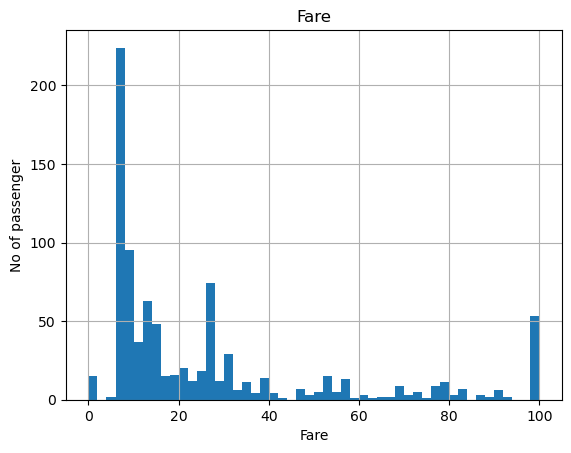

In [57]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

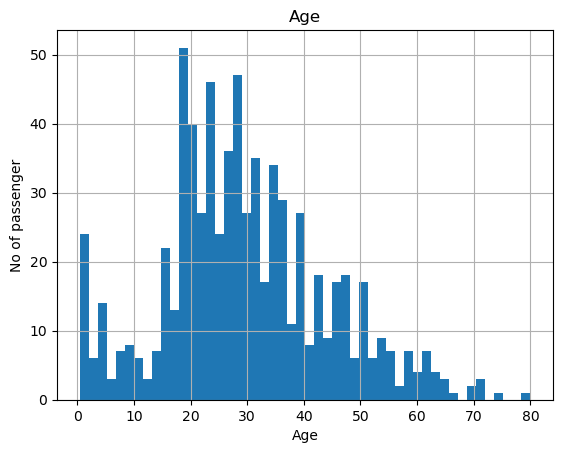

In [58]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=123)


In [64]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6666666666666666
roc_auc_score: 0.7563070316693505


In [66]:
##RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print('Accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.7154471544715447
roc_auc_score: 0.8004562533548041
